In [6]:

!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-IC:\Program Files\Graphviz\include" --config-settings="--global-option=-LC:\Program Files\Graphviz\lib" pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp312-cp312-win_amd64.whl size=99497 sha256=75ea9a75fe5f5169a4fd884fe95c6651da82b724596ea3427e0edf0cf5bc9469
  Stored in directory: c:\users\subud\appdata\local\pip\cache\wheels\e1\2f\c3\0f7719eda975973b474b79b98e1208e635565c1e4dac777ac8
Successfully built pygraphviz


networkx graphs loaded
Plotting networkx graphs...
Displaying networkx graph for gzip_cpu0.6_mem12_random40_lvl6_run2.log


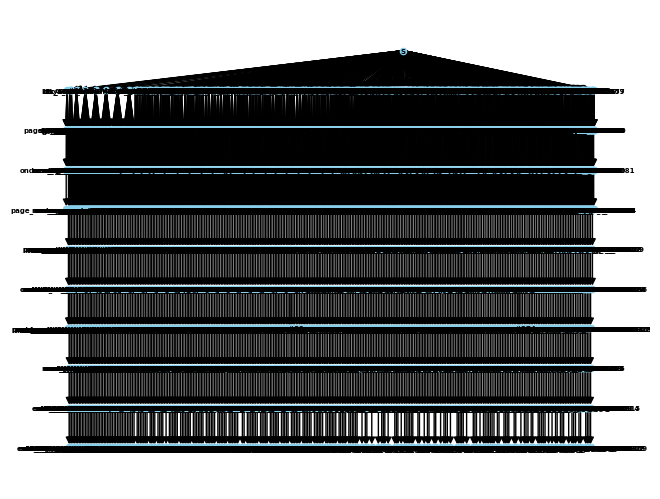

In [1]:
import pickle
import glob
from torch_geometric.utils import to_networkx, from_hetero_networkx
import matplotlib.pyplot as plt
import os
import networkx as nx

NUM_GRAPHS = 1 # Number of graphs to extract from pickled file
pkl_networkx_graphs = dict()
pkl_pyg_graphs = dict()

# Extract all graphs from .pkl files if they exist and plot them
if glob.glob(os.path.join("", f"*.pkl")):
    try:
        with open(os.path.join("", 'networkx.pkl'), 'rb') as file:
            try:
                for _ in range(NUM_GRAPHS):
                    f, networkx_graph = pickle.load(file)
                    pkl_networkx_graphs[f] = networkx_graph
            except EOFError as eof:
                print(f"[EOFError] Failed to load networkx graphs: {eof}")
        print("networkx graphs loaded")
    except Exception as e:
        print(f"Failed to load networkx graphs: {e}")
    if pkl_networkx_graphs:
        print("Plotting networkx graphs...")
        for file, G in pkl_networkx_graphs.items():
            print(f"Displaying networkx graph for {file}")
            pos = nx.nx_agraph.graphviz_layout(G, prog="dot", root='S')
            nx.draw(G, pos, with_labels=True, node_size=20, node_color="skyblue", font_size=5, font_weight="bold")
            plt.show()
else:
    print("No .pkl files found in the logs directory.")

In [2]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms
from convert import from_hetero_networkx
import torch_geometric
for file, G in pkl_networkx_graphs.items():
    graph = from_hetero_networkx(G, node_type_attribute="type")
    print(f"Displaying pyg graph")
    G_nx = to_networkx(graph.to_homogeneous(), to_undirected=True)
    pos = nx.spring_layout(G_nx)
    nx.draw(G_nx, pos, with_labels=True, node_size=20, node_color="skyblue", font_size=5, font_weight="bold")
    plt.show()

c:\Users\subud\GitHub Projects\Graph Training\convert.py:202: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hetero_data_dict[group][key] = torch.tensor(value)


['S', 'sys_openat', 'sys_close', 'new_sync_read', 'vfs_read', 'ksys_read', 'ext4_mpage_readpages', 'ext4_readahead', 'read_pages', 'page_cache_ra_unbounded', 'ondemand_readahead', 'page_cache_sync_ra', 'cpu', 'blk_account', 'page_cache_async_ra', 'ksys_write']
[('S', 'to', 'cpu'), ('S', 'to', 'ksys_write'), ('S', 'to', 'ksys_read'), ('S', 'to', 'blk_account'), ('vfs_read', 'to', 'new_sync_read'), ('ksys_read', 'to', 'vfs_read'), ('ext4_readahead', 'to', 'ext4_mpage_readpages'), ('read_pages', 'to', 'ext4_readahead'), ('page_cache_ra_unbounded', 'to', 'read_pages'), ('ondemand_readahead', 'to', 'page_cache_ra_unbounded'), ('page_cache_sync_ra', 'to', 'ondemand_readahead'), ('cpu', 'to', 'page_cache_sync_ra'), ('cpu', 'to', 'sys_openat'), ('cpu', 'to', 'sys_close'), ('cpu', 'to', 'vfs_read'), ('cpu', 'to', 'ksys_read'), ('page_cache_async_ra', 'to', 'ondemand_readahead'), ('new_sync_read', 'to', 'page_cache_async_ra'), ('cpu', 'to', 'ksys_write'), ('cpu', 'to', 'blk_account'), ('ksys_wri

RuntimeError: repeats can not be negative